<a href="https://colab.research.google.com/github/AdicherlaVenkataSai/GooglecrashML/blob/master/3.%20Linear_Regression_with_Synthetic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# importing the  modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [0]:
#import tensorflow as tf
#from tensorflow import keras
# model building
def build_model(learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()
  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units = 1, input_shape = (1,)))
  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error.
  model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = learning_rate),
                loss = 'mean_squared_error',
                metrics = [tf.keras.metrics.RootMeanSquaredError()])
  return model
  
def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""
  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x = feature, y = label, 
                      batch_size = batch_size, epochs =epochs)
  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]
  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)
  # Specifically gather the model's root mean 
  #squared error at each epoch.
  rmse = hist['root_mean_squared_error']

  return trained_weight, trained_bias, epochs, rmse


print("Defined create_model and train_model")

Defined create_model and train_model


In [0]:
#plotting functions

def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""
  #labelling the axes
  plt.xlabel('feature')
  plt.ylabel('label')
  #plot the feature values vs label values
  plt.scatter(feature, label)
  #creat a red line representinf the model
  #the red l ine starts as x0,y0 to x1,y1
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0,x1], [y0,y1], c = 'r')
  #render the scatter plot and the redline
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Root Mean Squared Error')
  plt.plot(epochs, rmse, label = 'loss')
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print('Defined the plot_the_model and plot_the_loss_curve functions')

Defined the plot_the_model and plot_the_loss_curve functions


In [0]:
#dataset

feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 174.7275 - root_mean_squared_error: 13.2185
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 167.9121 - root_mean_squared_error: 12.9581
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 163.0990 - root_mean_squared_error: 12.7710
Epoch 4/10
1/1 [==============================] - 0s 841us/step - loss: 159.1460 - root_mean_squared_error: 12.6153
Epoch 5/10
1/1 [==============================] - 0s 913us/step - loss: 155.6930 - root_mean_squared_error: 12.4777
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 152.5736 - root_mean_squared_error: 12.3521
Epoch 7/10
1/1 [==============================] - 0s 922us/step - loss: 149.6952 - root_mean_squared_error: 12.2350
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 147.0004 - root_mean_squared_error: 12.1244
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 144.4508 - r

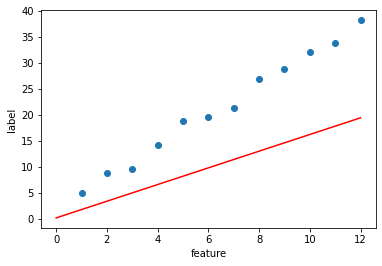

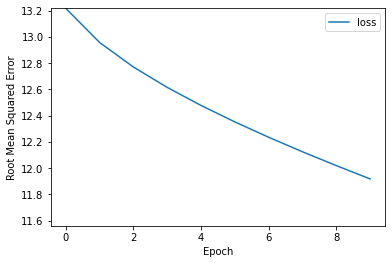

In [0]:
#specifying the hyperparameters
#learning_rate, epochs, batch_size

learning_rate = 0.01 #most commonly used rate
epochs = 10
batch_size = 12

#invoking the models

model  = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(model, feature, label, epochs, batch_size)
plot_the_model(trained_weight, trained_bias, feature, label)
plot_the_loss_curve(epochs, rmse)

##Task 1:Examine the graphs
Examine the top graph. The blue dots identify the actual data; the red line identifies the output of the trained model. Ideally, the red line should align nicely with the blue dots. Does it? Probably not.

A certain amount of randomness plays into training a model, so you'll get somewhat different results every time you train. That said, unless you are an extremely lucky person, the red line probably doesn't align nicely with the blue dots.

Examine the bottom graph, which shows the loss curve. Notice that the loss curve decreases but doesn't flatten out, which is a sign that the model hasn't trained sufficiently.

## Task 2: Increase the number of epochs

Training loss should steadily decrease, steeply at first, and then more slowly. Eventually, training loss should eventually stay steady (zero slope or nearly zero slope), which indicates that training has [converged](http://developers.google.com/machine-learning/glossary/#convergence).

In Task 1, the training loss did not converge. One possible solution is to train for more epochs.  Your task is to increase the number of epochs sufficiently to get the model to converge. However, it is inefficient to train past convergence, so don't just set the number of epochs to an arbitrarily high value.

Examine the loss curve. Does the model converge?

sol:
```
learning_rate = 0.01 #most commonly used rate
epochs =  10 to 500
batch_size = 12

#invoking the models

model  = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(model, feature, label, epochs, batch_size)
plot_the_model(trained_weight, trained_bias, feature, label)
plot_the_loss_curve(epochs, rmse)
```

## Task 3: Increase the learning rate

In Task 2, you increased the number of epochs to get the model to converge. Sometimes, you can get the model to converge more quickly by increasing the learning rate. However, setting the learning rate too high often makes it impossible for a model to converge. In Task 3, we've intentionally set the learning rate too high. Run the following code cell and see what happens.

sol:

```
# Increase the learning rate and decrease the number of epochs.
learning_rate=100 
epochs=500 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)
```

The resulting model is terrible; the red line doesn't align with the blue dots. Furthermore, the loss curve oscillates like a [roller coaster](https://www.wikipedia.org/wiki/Roller_coaster).  An oscillating loss curve strongly suggests that the learning rate is too high. 

## Task 4: Find the ideal combination of epochs and learning rate

Assign values to the following two hyperparameters to make training converge as efficiently as possible: 

*  learning_rate
*  epochs

sol:
```
#@title Double-click to view a possible solution

learning_rate=0.14
epochs=70
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)
```

## Task 5: Adjust the batch size

The system recalculates the model's loss value and adjusts the model's weights and bias after each **iteration**.  Each iteration is the span in which the system processes one batch. For example, if the **batch size** is 6, then the system recalculates the model's loss value and adjusts the model's weights and bias after processing every 6 examples.  

One **epoch** spans sufficient iterations to process every example in the dataset. For example, if the batch size is 12, then each epoch lasts one iteration. However, if the batch size is 6, then each epoch consumes two iterations.  

It is tempting to simply set the batch size to the number of examples in the dataset (12, in this case). However, the model might actually train faster on smaller batches. Conversely, very small batches might not contain enough information to help the model converge. 

Experiment with `batch_size` in the following code cell. What's the smallest integer you can set for `batch_size` and still have the model converge in a hundred epochs?

sol:

```
learning_rate=0.05
epochs=125
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)
```

## Summary of hyperparameter tuning

Most machine learning problems require a lot of hyperparameter tuning.  Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly.  You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

 * Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero. 
 * If the training loss does not converge, train for more epochs.
 * If the training loss decreases too slowly, increase the learning rate. Note that setting the training loss too high may also prevent training loss from converging.
 * If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
 * Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
 * Setting the batch size to a *very* small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
 * For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory. 

Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.